# Clustering con k-means

# 0. Preparación previa

Nºs aleatorios entre 0 y 1

In [79]:
import numpy as np

In [80]:
df = np.random.random(90).reshape(30,3) #30 filas x 3 columnas
df

array([[0.72865363, 0.75393603, 0.59744045],
       [0.50733568, 0.60294408, 0.4371023 ],
       [0.92752   , 0.55515202, 0.26941622],
       [0.75176667, 0.10593508, 0.86201296],
       [0.6570347 , 0.89420497, 0.57270174],
       [0.77831026, 0.54936143, 0.21930965],
       [0.31453034, 0.79530725, 0.84159851],
       [0.90229519, 0.04664858, 0.11655876],
       [0.40517178, 0.4428396 , 0.9776439 ],
       [0.02366471, 0.24743323, 0.86949023],
       [0.22388661, 0.55601231, 0.91097204],
       [0.12816994, 0.42964388, 0.64344709],
       [0.58373903, 0.90512299, 0.64806074],
       [0.97290481, 0.92244457, 0.22568662],
       [0.17134078, 0.58571418, 0.36907953],
       [0.36055961, 0.42648159, 0.11839845],
       [0.02477625, 0.62981198, 0.3804033 ],
       [0.79044273, 0.26587899, 0.4853158 ],
       [0.40523646, 0.89219742, 0.0247904 ],
       [0.90516696, 0.01958574, 0.89591348],
       [0.35813824, 0.93969728, 0.73801325],
       [0.34564301, 0.76151509, 0.24908855],
       [0.

In [81]:
#Seleccionamos 2 centroides al azar que actuarán como centroides

c1 = np.random.choice(range(len(df))) #Elige un nº al azar dentro del rango de la longitud de df
c2 = np.random.choice(range(len(df)))
clust_centers = np.vstack([df[c1],df[c2]]) #vstack para colocar uno debajo del otro dentro de un mismo array
clust_centers

array([[0.58373903, 0.90512299, 0.64806074],
       [0.72865363, 0.75393603, 0.59744045]])

# 2. Implementamos el método de K-means

In [82]:
from scipy.cluster.vq import vq

In [83]:
vq(df, clust_centers) #1º array: clasifica en clústers, 2º array: mide las distancias de cada obs. al baricentro

(array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 0], dtype=int32),
 array([0.        , 0.31223153, 0.43204492, 0.70031282, 0.10569029,
        0.43278106, 0.34927021, 0.87272798, 0.58819738, 0.89177917,
        0.56612223, 0.65851717, 0.        , 0.47566236, 0.59154444,
        0.68716872, 0.67814161, 0.50456863, 0.64845675, 0.81210434,
        0.24532132, 0.48630418, 0.35209972, 0.32809141, 0.52026499,
        0.4042222 , 0.69717548, 0.77899195, 0.58748651, 0.79206954]))

In [84]:
from scipy.cluster.vq import kmeans

In [85]:
kmeans(df, clust_centers) #Nos da la info de los baricentros

#El nº final es SSw normalizado

(array([[0.24200489, 0.64076585, 0.53154521],
        [0.81406666, 0.48703308, 0.47812952]]),
 0.39238036665324466)

In [86]:
kmeans(df, 2) #Tmb funciona si le indicas el nº de clústers que quieres

(array([[0.28418798, 0.66717727, 0.52235618],
        [0.84521619, 0.41346196, 0.48428953]]),
 0.39068948294259537)

# X. Ejercicio

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros

filename = "wine/winequality-red.csv" #Fichero a abrir
fullpath = mainpath + "/" + filename #Ruta completa
df = pd.read_csv(fullpath, sep=";")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

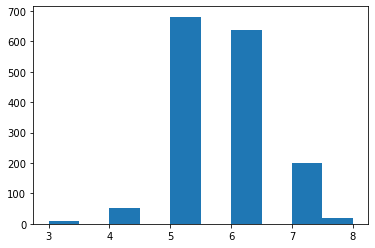

In [89]:
#Para ver la distribución de las votaciones

plt.hist(df["quality"])

In [90]:
#Para ver el promedio de parámetros en base a las calidades

df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [91]:
#Normalizamos/Tipificamos el dataset para que se muevan todas en el mismo rango

df_norm = (df - df.min()) / (df.max() - df.min()) #Fórmula para normalizar
df_norm.head() #Están ya entre 0 y 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [92]:
#Clustering jerárquico con scikit-learn

from sklearn.cluster import AgglomerativeClustering

In [93]:
#Creamos los clústers

clus = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(df_norm) #Parámetros = nº clústers, 

In [94]:
#Obtenemos las etiquetas -> para ver cada muestra a qué cluster pertenece

md_herar = pd.Series(clus.labels_)
md_herar

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Nº de vinos del cluster')

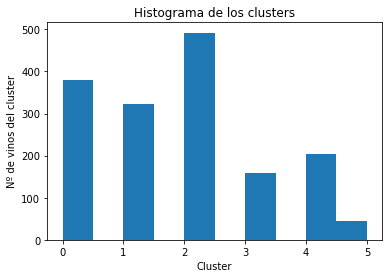

In [95]:
plt.hist(md_herar)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Nº de vinos del cluster")

In [96]:
#Para obtener los hijos de cada clúster

clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [97]:
# Representación gráfica con Dendrograma

from scipy.cluster.hierarchy import dendrogram, linkage

In [98]:
Z = linkage(df_norm, "ward")

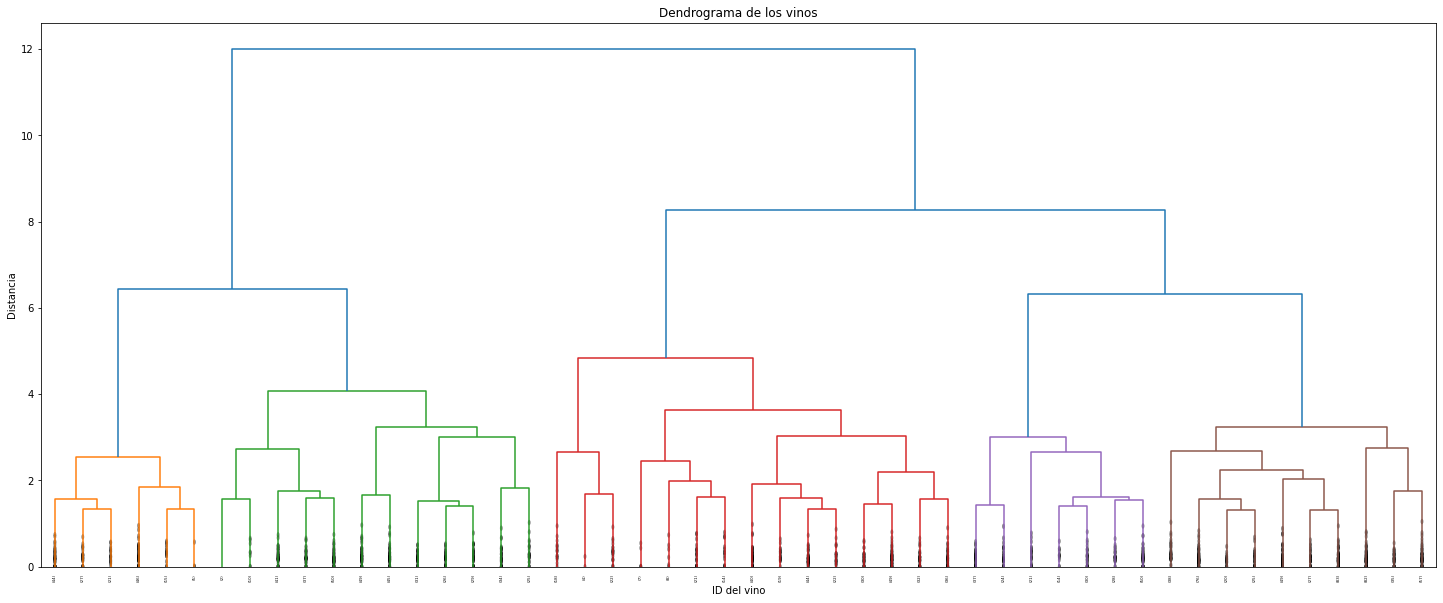

In [99]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4., color_threshold=0.5*12, truncate_mode="lastp", p=50, show_leaf_counts=True, show_contracted=True)
plt.show()

In [100]:
# Clustering con k-means

from sklearn.cluster import KMeans
from sklearn import datasets

In [101]:
model = KMeans(n_clusters = 6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [102]:
#Nos dará info de a qué clúster pertenece cada uno

model.labels_ #Este valor cambia cada vez que creas un modelo, no es determinista

array([4, 4, 4, ..., 2, 2, 3], dtype=int32)

In [105]:
#Para observarlo mejor, podemos crear una columna:

md_kmeans = pd.Series(model.labels_)

df_norm["clust_herar"] = md_herar
df_norm["clust_kmeans"] = md_kmeans

df_norm.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_herar,clust_kmeans
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4


(array([ 30.,   0., 308.,   0., 230.,   0., 267.,   0., 517., 247.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

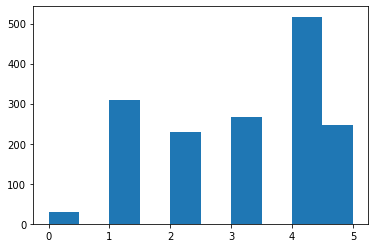

In [104]:
plt.hist(md_kmeans)

In [106]:
model.cluster_centers_ #Coordenadas del centroide para cada clúster

array([[0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.31818051, 0.27692874, 0.30677524, 0.15429923, 0.12614945,
        0.38558058, 0.29837364, 0.54146039, 0.43640514, 0.17971874,
        0.21471645, 0.45667752],
       [0.17610619, 0.32432996, 0.08913043, 0.09416319, 0.09608042,
        0.24856093, 0.12292211, 0.32587627, 0.57733653, 0.18516011,
        0.48637681, 0.61043478],
       [0.36379305, 0.15772664, 0.42168539, 0.10422759, 0.10550668,
        0.16162895, 0.08369397, 0.41361019, 0.41974107, 0.23694185,
        0.48326131, 0.69438202],
       [0.26439334, 0.35780399, 0.12517375, 0.09111044, 0.12336842,
        0.14605199, 0.11076852, 0.49167276, 0.48508801, 0.15537651,
        0.21938917, 0.43976834],
       [0.58281681, 0.20571516, 0.51311741, 0.13426876, 0.13123762,
        0.1391344 , 0.09203016, 0.6563401 , 0.33176066, 0.22262358,
        0.29247379,

In [107]:
model.inertia_ #Para calcular SSw, el valor de la suma de los cuadrados internos

186.56222848471444

# Interpretación final

Podemos usar nuestros clústers para poner un precio diferente a cada tipo de vino, o hacer campañas de mkt para personas que les gusta un tipo de vino, o crear una marca con vinos de la misma categoría, a lo mejor a la gente nórdica les gustan los vinos más dulces, o más ácidos...

In [110]:
#Calculamos el promedio de cada parámetro para cada clúster

df_norm.groupby("clust_herar").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_kmeans
clust_herar,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,3.248021
1,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,1.518634
2,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,3.804878
3,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,4.936709
4,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,2.156863
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,1.363636


In [111]:
df_norm.groupby("clust_herar").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_kmeans
clust_herar,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,3.248021
1,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,1.518634
2,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,3.804878
3,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,4.936709
4,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,2.156863
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,1.363636
